In [2]:
import tensorflow as tf
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Computer Vision and CNNs Exercises

1. Improve the binary classification food example to perform at 90%+
2. Improve the Multi-class Classification food example to perform at 50%+
3. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

## Exercise 1: Improve the binary classification food example to perform at 90%+

### Best I could do is 86% :(

### Becoming one with the data


In [ ]:
import zipfile
# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-09-30 18:39:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   273MB/s    in 0.4s    

2023-09-30 18:39:41 (273 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to find out how many images are in a file
#num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
#num_steak_images_train

# Get the class names (programmatically, this is much more helpful
# with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path

# Created a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape: {img.shape}") # show the shape of the image
    return img

Image shape: (512, 512, 3)


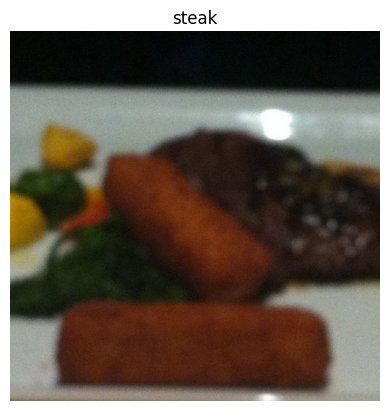

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
target_class="steak")

### Preprocessing data

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# We upload the training data with our train_datagen instance.
train_data = train_datagen_augmented.flow_from_directory(directory="pizza_steak/train/",
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      shuffle=True)

# Create ImageDataGenerator test instance
test_datagen = ImageDataGenerator(rescale=1/255.)

# We upload the test data rescaling every pixel with out test_datagen instance
test_data = test_datagen.flow_from_directory(directory="pizza_steak/test/",
                                                      target_size=(224, 224),
                                                      batch_size=32,
                                                      class_mode='binary')



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Training our model

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification -
# https://poloclub.github.io/cnn-explainer/ )

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(14, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(14, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(14, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history = model_1.fit(train_data, epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 54s 775ms/step - loss: 0.6421 - accuracy: 0.6273 - val_loss: 0.4829 - val_accuracy: 0.7940


KeyboardInterrupt: ignored

In [ ]:
model_1.summary()

In [ ]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(history)

## Exercise 2: Improve the Multi-class Classification food example to perform at 50%+

### Becoming one with the data 😳

In [3]:
import zipfile
# Download zip file of 10_food_classes images
# See how this data was created -https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras
#/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-07 15:11:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   193MB/s    in 2.6s    

2023-10-07 15:11:35 (193 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path('10_food_classes_all_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [5]:
import random
img = view_random_image(target_dir="10_food_classes_all_data/train/", target_class=random.choice(class_names))

NameError: ignored

### Preprocessing the data

In [8]:
# Rescale the data and create data generator instances
train_datagen2 = ImageDataGenerator(rescale=1/255., rotation_range=0.2,
                                    width_shift_range=0.2, height_shift_range=0.2,
                                    zoom_range=0.2, horizontal_flip=True)
test_datagen2 = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data2 = train_datagen2.flow_from_directory("10_food_classes_all_data/train", target_size=(224, 224),
                                               batch_size=32, class_mode='categorical')

test_data2 = train_datagen2.flow_from_directory("10_food_classes_all_data/test", target_size=(224, 224),
                                              batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [9]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units
    tf.keras.layers.Flatten(),


    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data2, epochs=5, steps_per_epoch=len(train_data2),
                        validation_data=test_data2, validation_steps=len(test_data2))

Epoch 1/5
235/235 [==============================] - 143s 607ms/step - loss: 2.1295 - accuracy: 0.2357 - val_loss: 2.0259 - val_accuracy: 0.2848


KeyboardInterrupt: ignored

In [6]:
model_2.evaluate(test_data2)

NameError: ignored

In [ ]:
plot_loss_curves(history_2)

### Training our model

## Exercise 3: Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [10]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 * 10**(epoch/20))

history_3 = model_2.fit(train_data2, epochs=7, steps_per_epoch=len(train_data2),
                        validation_data=test_data2, validation_steps=len(test_data2),
                        callbacks=[lr_scheduler])

Epoch 1/7


KeyboardInterrupt: ignored

In [ ]:
#Plot the learning rate versus the loss
lrs = 1e-4 * (10** (np.arange(7)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [11]:
lr = 2 * 1e-4

In [13]:
cloned_model = tf.keras.models.clone_model(model_2)

cloned_model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                metrics=["accuracy"])

history_4 = cloned_model.fit(train_data2, epochs=7, steps_per_epoch=len(train_data2),
                        validation_data=test_data2, validation_steps=len(test_data2))

Epoch 1/7
235/235 [==============================] - 147s 618ms/step - loss: 2.1520 - accuracy: 0.2189 - val_loss: 2.0018 - val_accuracy: 0.3044
Epoch 2/7
235/235 [==============================] - 137s 584ms/step - loss: 1.9974 - accuracy: 0.2995 - val_loss: 1.9184 - val_accuracy: 0.3344
Epoch 3/7
235/235 [==============================] - 136s 578ms/step - loss: 1.9239 - accuracy: 0.3361 - val_loss: 1.8682 - val_accuracy: 0.3484
Epoch 4/7
235/235 [==============================] - ETA: 0s - loss: 1.8673 - accuracy: 0.3584

KeyboardInterrupt: ignored